Dataset berhasil dibuat!
     Tanggal     Produk  Jumlah Terjual  Stok  Harga Satuan  Total Penjualan  \
0 2025-03-07      Rokok              25    23         27000           675000   
1 2025-03-08  Mie Setan              15    14         13000           195000   
2 2025-03-09     Cilung              20    19          1500            30000   
3 2025-03-10       Baso              30    30         15000           450000   
4 2025-03-11   Sop Buah              25    19          7500           187500   

   Keuntungan  
0      674975  
1      194985  
2       29980  
3      449970  
4      187475  
Akurasi Model: 0.50
Tidak perlu restock


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


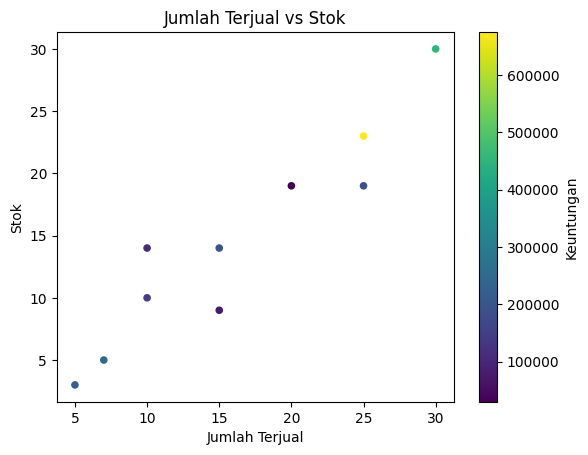

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# SOAL 1: Membuat Dataset Penjualan (Digitalise & Collect)
data = {
    "Tanggal": pd.date_range(start="2025-03-07", periods=10, freq="D"),
    "Produk": ["Rokok", "Mie Setan", "Cilung", "Baso", "Sop Buah", "Sosis Bakar", "Ayam Geprek", "Cumi Saus Tiram", "Kepiting Saus Balado", "Coffe Cappuccino"],
    "Jumlah Terjual": (25, 15, 20, 30, 25, 15, 10, 7, 5, 10 ),
    "Stok": (23, 14, 19, 30, 19, 9, 14, 5, 3, 10),
    "Harga Satuan": (27000, 13000, 1500, 15000, 7500, 5000, 11000, 35000, 45000, 15000)
}
df = pd.DataFrame(data)
df.to_csv("data_penjualan_latihan.csv", index=False)
print("Dataset berhasil dibuat!")

# SOAL 2: Membersihkan dan Mengolah Data (Transform)
df["Tanggal"] = pd.to_datetime(df["Tanggal"])
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] )
print(df.head())

# SOAL 3: Melatih Model AI (Train & Execute)
df["Restock"] = np.where(df["Stok"] < 5, 1, 0)
X = df[["Jumlah Terjual", "Stok"]]
y = df["Restock"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# SOAL 4: Prediksi Restock Produk (Execute & Insights)
prediction = model.predict([[8, 3]])
print("Perlu restock" if prediction[0] == 1 else "Tidak perlu restock")

# Visualisasi
df.plot.scatter(x="Jumlah Terjual", y="Stok", c="Keuntungan", colormap="viridis", title="Jumlah Terjual vs Stok")
plt.show()